# Geolocating SnowEx UAVSAR data
By: **Jack Tarricone** *(University of Nevada, Reno)*, **Zach Keskenin** *(Boise State)*, **Ross Palomaki** *(Montana State)*, **Naheem Adebisi** *(Boise State)* \
Guidance from: **Sam Neitlich** *(Montana State/JPL)*, **Yunling Lou** *(JPL)*

In the last notebook ```snowex_isce_uavsar_processing_tutorial.ipynb```, we created an interferogram in the Jemez Mountains, NM and unwrapped it using ISCE. This data is still in slant range and needs to be geolacted to groud projected coordinates.

This note book will go through the steps to do this, utilizing funcitonas in the ```uavsar_pytools``` package.


In [1]:
%matplotlib inline
import sys
import os
import glob
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
from uavsar_pytools.georeference import geolocate_uavsar
#from uavsar_pytools.georeference import geocodeUsingGdalWarp
#from uavsar_pytools.convert.tiff_conversion import read_annotation

In [2]:
# get home dir
working_dir = '/Users/jacktarricone/jemez_isce'
os.chdir(working_dir)
os.getcwd()

'/Users/jacktarricone/jemez_isce'

In [3]:
# igrams
igrams = 'igrams/20200212T1545_20200226T1627'
igrams_path = os.path.join(working_dir,igrams)
os.chdir(igrams_path)
os.getcwd()

'/Users/jacktarricone/jemez_isce/igrams/20200212T1545_20200226T1627'

In [4]:
# list all files 
! ls *

20200212T1545_20200226T1627.amp
20200212T1545_20200226T1627.amp.vrt
20200212T1545_20200226T1627.amp.xml
20200212T1545_20200226T1627.coh
20200212T1545_20200226T1627.coh.vrt
20200212T1545_20200226T1627.coh.xml
20200212T1545_20200226T1627.int
20200212T1545_20200226T1627.int.vrt
20200212T1545_20200226T1627.int.xml
20200212T1545_20200226T1627.unw_snaphu.unw
20200212T1545_20200226T1627.unw_snaphu.unw.conncomp
20200212T1545_20200226T1627.unw_snaphu.unw.conncomp.vrt
20200212T1545_20200226T1627.unw_snaphu.unw.conncomp.xml
20200212T1545_20200226T1627.unw_snaphu.unw.vrt
20200212T1545_20200226T1627.unw_snaphu.unw.xml


### Plot Slant Range Unwrapped Phase
ISCE and the unwrapping process (ICU/SNAPHU) produces an interferogram (.int), unwrapped phase (.unw), coherence (.coh), and unwrapping components (.unw.conncomp) in slant range. These products need to be georefernced.

/Users/jacktarricone/miniconda3/envs/uavsar_pytools/lib/python3.10/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


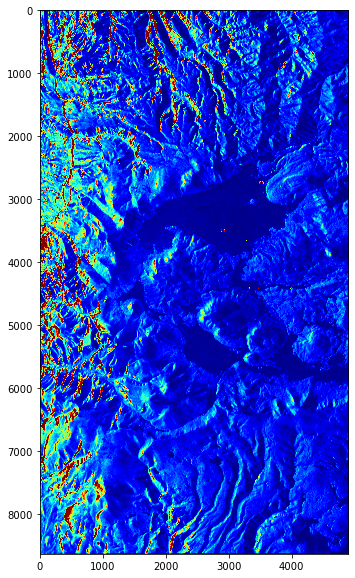

In [24]:
# test plot unw file
with rio.open('20200212T1545_20200226T1627.unw_snaphu.unw.vrt') as src:
    phase_data = src.read(1) # read second band of unw files
    
fig = plt.figure(figsize=(14, 10))
plt.imshow(phase_data, vmin = 0, vmax = 7, cmap = 'jet')

## Geolocate the data
We'll use the ```geolocate_uavsar``` on the interferograms we created.

In [6]:
# get function info
?geolocate_uavsar

Signature: geolocate_uavsar(in_fp, ann_fp, out_dir, llh_fp)
Docstring:
Geolocates a uavsar image using an array of latitudes and longitudes.
Can be either an SLC or Look Vector. If SLC will save as a tif of real
and a tif of complex values.
in_fp: file path of file to geolocate
ann_fp: file path to annotation file
out_dir: directory to save geolocated files
llh_fp: file path to UAVSAR lat, long, elev files for georeferencing

returns:
List: files that have been created
File:      ~/miniconda3/envs/uavsar_pytools/lib/python3.10/site-packages/uavsar_pytools/georeference.py
Type:      function


In [25]:
## set function inputs

# input data
phase_data = '20200212T1545_20200226T1627.unw_snaphu.unw.vrt'

# annotationn file
ann_fp = '/Users/jacktarricone/jemez_isce/download/alamos_35915_20013_000_200226_L090HH_01_BU.ann'

# saving directory
out_dir = '/Users/jacktarricone/jemez_isce/igrams/20200212T1545_20200226T1627'

# lat lon heigh file
llh_fp = '/Users/jacktarricone/jemez_isce/download/alamos_35915_01_BU_s1_2x8.llh'

In [26]:
# run funciton
unw_geolocated = geolocate_uavsar(in_fp = phase_data, ann_fp = ann_fp, out_dir = out_dir, llh_fp = llh_fp)
print(unw_geolocated)

Ignore the error message: Unable to compute bounds. It is related
                to the pixels created by the conversion along the edge of topography.
                Error message is known and should not be an issue.
['/Users/jacktarricone/jemez_isce/igrams/20200212T1545_20200226T1627/20200212T1545_20200226T1627.unw_snaphu.unw.tif.unw.tif']


In [ ]:
with rio.open('/Users/jacktarricone/jemez_isce/igrams/20200212T1545_20200226T1627/tmp/llh.dem.tif') as src:
    plt.subplots(1, figsize=(7, 7))
    show(src) 

In [ ]:
# working folder name
isce_directory = 'jemez_isce'
    
# path to folder
working_dir = os.path.join(home,isce_directory)

In [ ]:
# make new folder
#os.mkdir(working_dir)
print("Directory '%s' created" %isce_directory)

In [ ]:
# nativate to new folder
os.chdir(working_dir)
os.getcwd()

In [ ]:
## create subdirectories

# download
dl = 'download'
download_path = os.path.join(working_dir,dl)
#os.mkdir(download_path)

# slc
SLC = 'SLC'
slc_path = os.path.join(working_dir,SLC)
#os.mkdir(slc_path)

# baselines
bl = 'baselines'
baselines_path = os.path.join(working_dir,bl)
#os.mkdir(baselines_path)

# referenceShelve
rs = 'referenceShelve'
referenceShelve_path = os.path.join(working_dir,rs)
#os.mkdir(referenceShelve_path)

# dem
dem = 'DEM'
dem_path = os.path.join(working_dir,dem)
#os.mkdir(dem_path)

# igrams
igrams = 'igrams'
igrams_path = os.path.join(working_dir,igrams)
#os.mkdir(igrams_path)

In [ ]:
# check folders were created
for file in os.listdir(working_dir):
    d = os.path.join(working_dir, file)
    if os.path.isdir(d):
        print(d)

## Data Download

Data links can be found on the UAVSAR site [here](https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=alamos_35915_01#data"). In this case we'll be using SLCs from Feb 12th and 26th, both the LLH and LKV files, 1x1 pixel spacing, and just the HH polarization. By selecting these options, the site generates the list of ```wget``` download commands below.

 <p align="center">
  <img width="600" src="imgs/uavsar_data_portal.png">
</p>     
<p style="text-align: center;">
    (Data download screen)
</p>

Here the links are formatted as a string and saved as an exeutable shell file (.sh). This can also be down outside of this notebook by copying the links directly from the UAVSAR data portal and saving into your local text editor.

In [ ]:
# nativate to download folder
os.chdir(download_path)
os.getcwd()

In [ ]:
# create .sh file from links

links = ['wget https://downloaduav2.jpl.nasa.gov/Release30/alamos_35915_01/alamos_35915_01_BU.dop',
         'wget https://downloaduav2.jpl.nasa.gov/Release30/alamos_35915_01/alamos_35915_01_BU_s1_2x8.llh',
         'wget https://downloaduav2.jpl.nasa.gov/Release30/alamos_35915_01/alamos_35915_01_BU_s1_2x8.lkv',
         'wget https://downloaduav2.jpl.nasa.gov/Release30/alamos_35915_01/alamos_35915_20005_003_200212_L090HH_01_BU_s1_1x1.slc',
         'wget https://downloaduav2.jpl.nasa.gov/Release30/alamos_35915_01/alamos_35915_20005_003_200212_L090HH_01_BU.ann',
         'wget https://downloaduav2.jpl.nasa.gov/Release30/alamos_35915_01/alamos_35915_20013_000_200226_L090HH_01_BU_s1_1x1.slc',
         'wget https://downloaduav2.jpl.nasa.gov/Release30/alamos_35915_01/alamos_35915_20013_000_200226_L090HH_01_BU.ann']

with open('downloads.sh', 'w') as f:
    for links in links:
        f.write(links)
        f.write('\n')

In [ ]:
# ! sh downloads.sh

In [ ]:
# list files downloaded
for i in os.listdir(download_path):
    file = os.path.join(download_path, i)
    print(file)

## Prepare SLC Stack

In [ ]:
# nativate to download folder
os.chdir(working_dir)
os.getcwd()

In [ ]:
# copy doppler file to working directory
shutil.copy("/Users/jacktarricone/jemez_isce/download/alamos_35915_01_BU.dop", 
            "/Users/jacktarricone/jemez_isce/alamos_35915_01_BU.dop")

In [ ]:
# check function inputs
! prepareUAVSAR_coregStack_segmets.py -h

In this case our -i flag will the the download folder, the -d flag will be the doppler file, -o will be the SLC directory.

In [ ]:
# ! prepareUAVSAR_coregStack_segmets.py --input download/ --dop_file alamos_35915_01_BU.dop --output SLC

In [ ]:
# list folders just created in slc path
!ls SLC/*

In [ ]:
os.getcwd()

In [ ]:
# using gdal info the check everything worked
! gdalinfo SLC/20200212T1545/alamos_35915_20005_003_200212_L090HH_01_BU_s1_1x1.slc

In [ ]:
ds = gdal.Open("/Users/jacktarricone/jemez_isce/SLC/20200212T1545/alamos_35915_20005_003_200212_L090HH_01_BU_s1_1x1.slc", gdal.GA_ReadOnly)
# extract a part of the SLC to display
x0 = 0
y0 = 0
x_offset = 9789
y_offset = 69021  
slc = ds.GetRasterBand(1).ReadAsArray(x0, y0, x_offset, y_offset)
ds = None

fig = plt.figure(figsize=(14, 12))

# display amplitude of the slc
ax = fig.add_subplot(1,2,1)
ax.imshow(np.abs(slc), vmin = 0, vmax=1, cmap='gray')
ax.set_title("amplitude")

#display phase of the slc
ax = fig.add_subplot(1,2,2)
ax.imshow(np.angle(slc))
ax.set_title("phase")

plt.show()

slc = None

## Create Interferograms
more info here.....

In [ ]:
! uavsar_crossmul.py -h 

In [ ]:
# ! uavsar_crossmul.py --slc_dir SLC/ --alks 8 --rlks 2 --num_connections 1 --outdir igrams 

In [ ]:
# print current directories
! ls igrams/*/*

In [ ]:
# plot amplitude and wrapped interferogram

w_int = 'igrams/20200212T1545_20200226T1627/20200212T1545_20200226T1627.int'
ds = gdal.Open(w_int, gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

fig = plt.figure(figsize=(10, 14))

ax = fig.add_subplot(1,2,1)
ax.imshow(np.abs(igram), vmin = 0 , vmax = 10.0, cmap = 'gray')
ax.set_title("magnitude")
ax.set_axis_off()

ax = fig.add_subplot(1,2,2)
ax.imshow(np.angle(igram), cmap = 'jet', vmin=-3.14, vmax=3.14)
ax.set_title("Phase")
ax.set_axis_off()

# Phase Unwrapping

In [ ]:
# create text file of date list
! ls igrams/ | awk -F "/" '{print $1}' >> datelist.txt

In [ ]:
# print contents of that file
with open('datelist.txt') as f:
    lines = f.readlines()
    print(lines)

In [ ]:
! unwrap.py -h

In [ ]:
# run snaphu, this will take a while
#! awk -F "_" '{print "unwrap.py -i igrams/"$1"_"$2"/"$1"_"$2".int -u igrams/"$1"_"$2"/"$1"_"$2".unw -c igrams/"$1"_"$2"/"$1"_"$2".coh -a 12 -r 3 -s SLC/"$1"/ -m snaphu"}' datelist.txt >> unwall.sh
#! sh unwall.sh

In [ ]:
# list files generated in unwrapping process
!ls igrams/*/*

In [ ]:
# plot

# reading the multi-looked wrapped interferogram
ds = gdal.Open("igrams/20200212T1545_20200226T1627/20200212T1545_20200226T1627.int", gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

# reading the multi-looked unwrapped interferogram
ds = gdal.Open("igrams/20200212T1545_20200226T1627/20200212T1545_20200226T1627.unw_snaphu.unw", gdal.GA_ReadOnly)
igram_unw = ds.GetRasterBand(2).ReadAsArray()
ds = None

# reading the connected component file
ds = gdal.Open("igrams/20200212T1545_20200226T1627/20200212T1545_20200226T1627.unw_snaphu.unw.conncomp", gdal.GA_ReadOnly)
connected_components = ds.GetRasterBand(1).ReadAsArray()
ds = None

fig = plt.figure(figsize=(18, 16))

ax = fig.add_subplot(1,3,1)
cax=ax.imshow(np.angle(igram), cmap='jet')
ax.set_title("wrapped")
#ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[-3.14,0,3.14],orientation='horizontal')
cbar.ax.set_xticklabels(["$-\pi$",0,"$\pi$"])

ax = fig.add_subplot(1,3,2)
cax = ax.imshow(igram_unw, vmin = 0, vmax = 7, cmap = 'jet')
ax.set_title("unwrapped")
ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[0,3.5,7], orientation='horizontal')


ax = fig.add_subplot(1,3,3)
cax = ax.imshow(connected_components, cmap = 'jet')
ax.set_title("components")
ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[0,21] , orientation='horizontal')
cbar.ax.set_xticklabels([0,21])


connected_components = None